/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


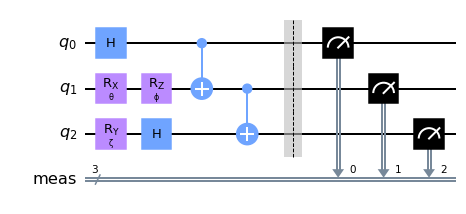

In [9]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers, models
import pandas as pd

# Create a parameterized quantum circuit with 3 qubits
theta = Parameter('θ')
phi = Parameter('ϕ')
zeta = Parameter('ζ')
qc = QuantumCircuit(3)
qc.h(0)
qc.rx(theta, 1)
qc.rz(phi, 1)
qc.ry(zeta, 2)
qc.h(2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Display the circuit
qc.draw('mpl')


/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_28002/3227686532.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})


Result for θ = 0.00, ϕ = 0.00, ζ = 0.00: {'100': 241, '111': 237, '000': 267, '011': 279}
Result for θ = 0.00, ϕ = 0.00, ζ = 0.70: {'100': 88, '011': 90, '000': 397, '111': 449}
Result for θ = 0.00, ϕ = 0.00, ζ = 1.40: {'100': 1, '111': 514, '011': 8, '000': 501}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.09: {'100': 34, '111': 501, '000': 462, '011': 27}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.79: {'111': 325, '000': 342, '011': 180, '100': 177}
Result for θ = 0.00, ϕ = 0.00, ζ = 3.49: {'111': 166, '000': 171, '011': 318, '100': 369}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.19: {'111': 22, '100': 466, '011': 492, '000': 44}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.89: {'111': 2, '000': 2, '011': 509, '100': 511}
Result for θ = 0.00, ϕ = 0.00, ζ = 5.59: {'111': 82, '100': 421, '000': 91, '011': 430}
Result for θ = 0.00, ϕ = 0.00, ζ = 6.28: {'111': 277, '100': 243, '011': 236, '000': 268}
Result for θ = 0.00, ϕ = 0.70, ζ = 0.00: {'111': 247, '100': 268, '011': 240, '000': 269}
Result for θ = 0.00, ϕ = 0

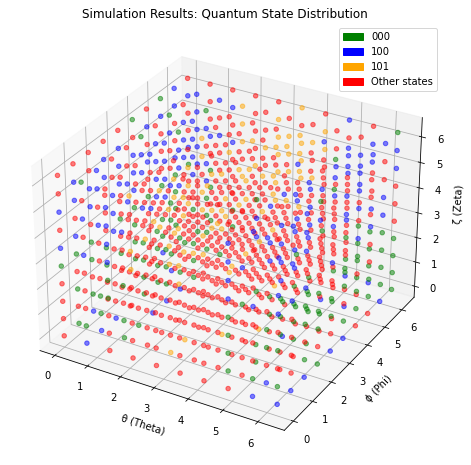

Simulation results have been exported to '3d_simulation_results.json'.


In [18]:
# Define a range of parameter values
theta_values = np.linspace(0, 2 * np.pi, 10)
phi_values = np.linspace(0, 2 * np.pi, 10)
zeta_values = np.linspace(0, 2 * np.pi, 10)

# Simulate the circuit for each combination of parameter values
simulator = Aer.get_backend('aer_simulator')
results = []

for theta_val in theta_values:
    for phi_val in phi_values:
        for zeta_val in zeta_values:
            # Set the parameter values
            bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})
            # Transpile the circuit for the simulator
            compiled_circuit = transpile(bound_circuit, simulator)
            # Run the simulation
            result = simulator.run(compiled_circuit).result()
            # Get the counts of the result
            counts = result.get_counts()
            results.append((theta_val, phi_val, zeta_val, counts))

x_coords = []
y_coords = []
z_coords = []
colors = []

for theta_val, phi_val, zeta_val, result in results:
    # Print the result
    print(f'Result for θ = {theta_val:.2f}, ϕ = {phi_val:.2f}, ζ = {zeta_val:.2f}: {result}')
    
    # Determine the color based on the most frequent outcome
    max_state = max(result, key=result.get)
    if max_state == '000':
        color = 'green'
    elif max_state == '100':
        color = 'blue'
    elif max_state == '101':
        color = 'orange'
    else:
        color = 'red'
    
    # Append the coordinates and color to the arrays
    x_coords.append(theta_val)
    y_coords.append(phi_val)
    z_coords.append(zeta_val)
    colors.append(color)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors, alpha=0.5)

# Set labels and title
ax.set_xlabel('θ (Theta)')
ax.set_ylabel('ϕ (Phi)')
ax.set_zlabel('ζ (Zeta)')
plt.title('Simulation Results: Quantum State Distribution')

# Legend
green_patch = Patch(color='green', label='000')
blue_patch = Patch(color='blue', label='100')
orange_patch = Patch(color='orange', label='101')
red_patch = Patch(color='red', label='Other states')

plt.legend(handles=[green_patch, blue_patch, orange_patch, red_patch])

plt.show()
fig.savefig('3d_simulation_results_plot.png')

# Prepare data for JSON export
data_for_export = []
for theta_val, phi_val, zeta_val, result in results:
    data_point = {
        'theta': theta_val,
        'phi': phi_val,
        'zeta': zeta_val,
        'result': result
    }
    data_for_export.append(data_point)

# Export to JSON file
with open('3d_simulation_results.json', 'w') as json_file:
    json.dump(data_for_export, json_file, indent=4)

# Inform the user that the data has been exported
print("Simulation results have been exported to '3d_simulation_results.json'.")


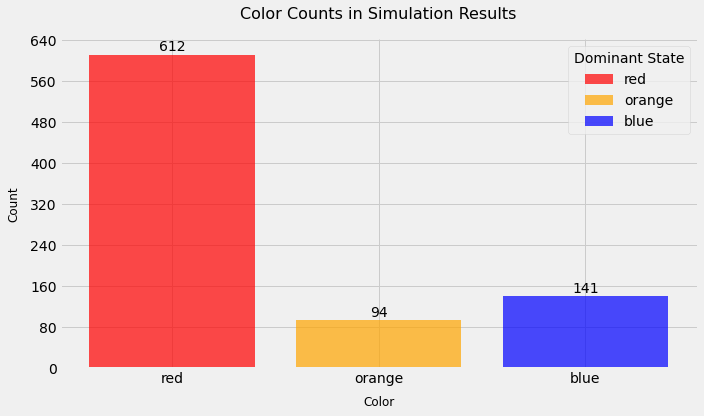

In [22]:
# Use a fancy style
plt.style.use('fivethirtyeight')

# Count the occurrences of each color
color_counts = Counter(colors)

# Extract colors and their counts for plotting
colors_for_plot = ['red', 'orange', 'blue']
counts_for_plot = [color_counts[color] for color in colors_for_plot]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(colors_for_plot, counts_for_plot, color=colors_for_plot, alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', color='black')

# Set labels, title, and legend
ax.set_xlabel('Color', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Color Counts in Simulation Results', fontsize=16, pad=20)
ax.legend(bars, colors_for_plot, title='Dominant State')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Use integer y-axis labels
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


Epoch 1/200
20/20 [==============================] - 6s 24ms/step - loss: 0.1378 - val_loss: 0.0561
Epoch 2/200
20/20 [==============================] - 0s 16ms/step - loss: 0.0495 - val_loss: 0.0390
Epoch 3/200
20/20 [==============================] - 0s 14ms/step - loss: 0.0398 - val_loss: 0.0262
Epoch 4/200
20/20 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0256
Epoch 5/200
20/20 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.0109
Epoch 6/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0087
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0060
Epoch 8/200
20/20 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 9/200
20/20 [==============================] - 0s 11ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 10/200
20/20 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0044
Epoc

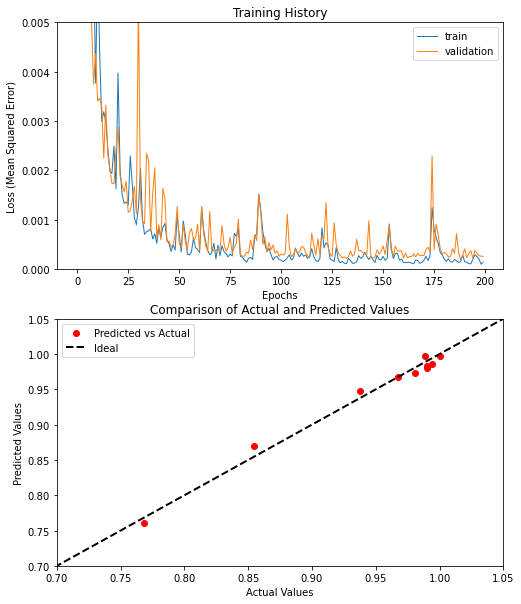

Actual value: 0.990234375, Predicted value: 0.9831026196479797
Actual value: 1.0, Predicted value: 0.9969423413276672
Actual value: 0.8544921875, Predicted value: 0.8700219988822937
Actual value: 0.9375, Predicted value: 0.9474822282791138
Actual value: 0.990234375, Predicted value: 0.9808089137077332
Actual value: 0.98046875, Predicted value: 0.9735856056213379
Actual value: 0.98828125, Predicted value: 0.9977077841758728
Actual value: 0.994140625, Predicted value: 0.9862218499183655
Actual value: 0.7685546875, Predicted value: 0.7608488202095032
Actual value: 0.9677734375, Predicted value: 0.9675564169883728


In [22]:
# Assuming you have a DataFrame 'df' with 'theta', 'phi', 'zeta', and 'error_rate' columns
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
# Assuming 'results' is a list of tuples as before, containing parameter values and count dictionaries
error_rates = []
for theta_val, phi_val, zeta_val, result in results:
    total_counts = sum(result.values())
    error_counts = total_counts - result.get('000', 0)  # Assuming '000' is the expected outcome
    error_rate = error_counts / total_counts
    error_rates.append(error_rate)

# Make sure the DataFrame is initialized with the correct number of rows
df = pd.DataFrame({
    'theta': [theta_val for theta_val, _, _, _ in results],
    'phi': [phi_val for _, phi_val, _, _ in results],
    'zeta': [zeta_val for _, _, zeta_val, _ in results],
    'error_rate': error_rates
})

# Prepare your data
X = df[['theta', 'phi', 'zeta']].values  # Features
y = df['error_rate'].values              # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model with additional layers
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(3,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer: no activation, we want a regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

# Predictions
predictions = model.predict(X_test)

# Set up a subplot grid with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot for the training history
ax1.plot(history.history['loss'], label='train', linewidth=1)
ax1.plot(history.history['val_loss'], label='validation', linewidth=1)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (Mean Squared Error)')
ax1.set_title('Training History')
ax1.legend()
ax1.set_ylim(0, 0.005)  # Adjusting the y-axis limits

# Plot for the comparison of actual vs predicted values
ax2.scatter(y_test[:10], predictions[:10].flatten(), color='red', label='Predicted vs Actual')

# Extend the ideal line a bit further
ideal_range_start = y.min() - 0.1
ideal_range_end = y.max() + 0.1
ax2.plot([ideal_range_start, ideal_range_end], [ideal_range_start, ideal_range_end], 'k--', lw=2, label='Ideal')

ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Comparison of Actual and Predicted Values')

# Set the range for x and y
ax2.set_xlim(0.7, 1.05)
ax2.set_ylim(0.7, 1.05)

ax2.legend()

# Save the combined plot
fig.savefig('combined_plots.png')
plt.show()



# Compare actual vs predicted values (maybe for a few samples)
for i in range(10):
    print(f"Actual value: {y_test[i]}, Predicted value: {predictions[i][0]}")

